# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [3]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


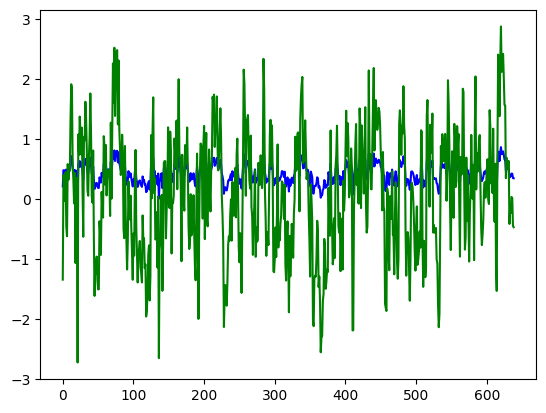

In [3]:
### target stops in 2019
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# Only contemporary week, all regions

## Features

In [4]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

df_test_unfolded_std = pd.DataFrame()
df_trainVal_unfolded_std = pd.DataFrame()

for col in ['cyclostationary_mean_tg','cyclostationary_mean_rr']:
    df_train_unfolded_std_loc,df_val_unfolded_std_loc,df_test_unfolded_std_loc,df_trainVal_unfolded_std_loc = prepare_features(path,col,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)
    df_trainVal_unfolded_std_loc = df_trainVal_unfolded_std_loc.add_prefix(col)
    df_trainVal_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_trainVal_unfolded_std_loc], axis=1)
    df_test_unfolded_std_loc = df_test_unfolded_std_loc.add_prefix(col)
    df_test_unfolded_std = pd.concat([df_test_unfolded_std, df_test_unfolded_std_loc], axis=1)

df_trainVal_unfolded_std.head()

,cyclostationary_mean_tgmean_12.149860342381333_43.74986055078544,cyclostationary_mean_tgmean_12.149860342381333_43.8498605504681,cyclostationary_mean_tgmean_12.149860342381333_43.94986055015075,cyclostationary_mean_tgmean_12.149860342381333_44.04986054983341,cyclostationary_mean_tgmean_12.149860342381333_44.14986054951606,cyclostationary_mean_tgmean_12.149860342381333_44.24986054919872,cyclostationary_mean_tgmean_12.149860342381333_44.34986054888138,cyclostationary_mean_tgmean_12.149860342381333_44.44986054856403,cyclostationary_mean_tgmean_12.149860342381333_44.54986054824669,cyclostationary_mean_tgmean_12.149860342381333_44.64986054792934,...,cyclostationary_mean_rrmean_9.949860351182458_44.849860547294654,cyclostationary_mean_rrmean_9.949860351182458_45.14986054634262,cyclostationary_mean_rrmean_9.949860351182458_45.24986054602528,cyclostationary_mean_rrmean_9.949860351182458_45.04986054665997,cyclostationary_mean_rrmean_9.949860351182458_44.949860546977305,cyclostationary_mean_rrmean_10.949860347181946_44.64986054792934,cyclostationary_mean_rrmean_10.949860347181946_44.749860547612,cyclostationary_mean_rrmean_10.949860347181946_44.849860547294654,cyclostationary_mean_rrmean_10.949860347181946_45.04986054665997,cyclostationary_mean_rrmean_10.949860347181946_44.949860546977305
0,0.719982,0.737633,0.791074,0.848973,0.983768,1.172439,1.201792,1.127842,0.986823,0.794499,...,1.030778,0.906438,1.088826,0.773453,0.418412,0.455843,0.716787,0.610504,0.725402,0.749478
1,1.845931,2.162888,2.278888,2.313132,2.330406,2.363919,2.119857,2.008556,1.797622,1.626867,...,0.425467,0.882635,1.038542,0.680932,0.554635,-0.180327,-0.182892,-0.163364,0.278071,0.120539
2,-0.312107,-0.404970,-0.361520,-0.116017,0.037568,0.199148,0.215971,0.233859,0.106281,-0.117314,...,0.546370,0.010690,-0.001136,0.034397,0.037126,-0.109250,-0.161918,-0.223150,-0.226756,-0.227135
3,1.666516,1.661740,1.601745,1.595421,1.579804,1.588420,1.391649,1.185715,1.141724,0.968893,...,0.002881,-0.046510,0.443789,-0.015739,-0.036101,-0.420711,-0.471142,-0.426586,-0.281830,-0.304843
4,-0.031846,-0.003213,-0.013352,0.122002,0.295776,0.473944,0.532393,0.421560,0.238369,-0.025356,...,-0.372997,-0.458397,-0.486089,-0.438463,-0.407427,1.070021,0.731822,0.323260,-0.245857,0.239262


## temperature

### wrapper

In [7]:
filter_col = [col for col in df_trainVal_unfolded_std if col.startswith('cyclostationary_mean_tg')]

selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std[filter_col], target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.1283310525579271
actual validation score: 0.21466390488473064, number of remaining columns: 989

actual training score: 0.1629467710047069
actual validation score: 0.2522791932857079, number of remaining columns: 988

actual training score: 0.16660889616646946
actual validation score: 0.27019437721407813, number of remaining columns: 987

actual training score: 0.19140294065046115
actual validation score: 0.2806937359248217, number of remaining columns: 986

actual training score: 0.19221941431474587
actual validation score: 0.2882441423201654, number of remaining columns: 985

actual training score: 0.19528480564133266
actual validation score: 0.30143419808366745, number of remaining columns: 984

actual training score: 0.19573892849955776
actual validation score: 0.3065584094948446, number of remaining columns: 983

actual training score: 0.20438575198849418
actual validation score: 0.3174794339936907, number of remaining columns: 982

actual training score: 

Full aggregate regression train score: 0.8323727699247407, test score: -4.967175042881774e+21
Aggregate regression train score with FS: 0.39527181047625004, test score: -0.9760995532418546


In [9]:
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.8323727699247407, test score: -4.967175042881774e+21
Aggregate regression train score with FS: 0.24052542979785074, test score: -0.0105251874466461


### CMI FS

In [10]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std[filter_col]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std[filter_col].columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(961, 0.14998699676357055), (960, 0.14933536712992324), (965, 0.14860373806543736), (757, 0.14553530924467203), (829, 0.14314293874625258), (336, 0.14254955357731547), (966, 0.1412488284588791), (751, 0.1400350398045634), (748, 0.13975709725677637), (692, 0.13930561897650673), (665, 0.138657819755087), (275, 0.1377948913850727), (573, 0.13678834355637548), (684, 0.13496708664839488), (752, 0.1349471030987045), (963, 0.1349170730411436), (683, 0.13370736679082068), (912, 0.1336253951612861), (173, 0.1331824996521766), (967, 0.13270113122246438), (833, 0.1326441028111571), (905, 0.13247441716956537), (742, 0.1321612989041681), (225, 0.1320161251059858), (741, 0.13168952030710382), (477, 0.13161612215965893), (962, 0.1314947303492075), (689, 0.13146931094585362), (317, 0.13115068945152364), (898, 0.13043798808455945), (968, 0.13021214040178367), (750, 0.12963428128905047), (743, 0.12854348517891354), (287, 0.12845210845755864), (827, 0.12809981166590803), (347, 0.12

CMI: 0.0042631518129477575
CMI: 0.003608455069817995
CMI: 0.014168093979220586
CMI: 0.00393189702682914
CMI: 0.00046684909142588604
CMI: 0.0036504632891954936
CMI: 0.0022731850555627875
CMI: 0.0031370080734286765
CMI: 0.00853475930380962
CMI: 0.007523181380243521
Highest CMI score: 0.014168093979220586
Adding original feature: 336
CMI: 0.005823717670258577
CMI: 0.002432400726762096
CMI: 0.00372104232074541
Highest CMI score: 0.005823717670258577
Adding original feature: 116
Highest CMI score: -0.0029824646047259262

[961, 336, 116]

Full aggregate regression train score: 0.8323727699247407, test score: -4.967175042881774e+21
Aggregate regression train score with FS: 0.15612806905648835, test score: 0.14440652853764602


## precipitation

### wrapper

In [5]:
filter_col = [col for col in df_trainVal_unfolded_std if col.startswith('cyclostationary_mean_rr')]

selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std[filter_col], target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.09197905645373583
actual validation score: 0.03682931775650522, number of remaining columns: 989

actual training score: 0.09383138769966859
actual validation score: 0.046658315437893116, number of remaining columns: 988

actual training score: 0.09521492561394607
actual validation score: 0.054998885824532495, number of remaining columns: 987

actual training score: 0.1100500289922941
actual validation score: 0.08600230920927643, number of remaining columns: 986

actual training score: 0.11340468253291192
actual validation score: 0.11104471804086391, number of remaining columns: 985

actual training score: 0.11403920142678281
actual validation score: 0.11847264041393224, number of remaining columns: 984

actual training score: 0.11607389107844424
actual validation score: 0.1287109901265321, number of remaining columns: 983

actual training score: 0.11944896754025314
actual validation score: 0.13556422762248932, number of remaining columns: 982

actual training 

Full aggregate regression train score: 0.8332194932387046, test score: -3.224786650352033e+22
Aggregate regression train score with FS: 0.24615777595126964, test score: -0.248342644544562


In [6]:
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.8332194932387046, test score: -3.224786650352033e+22
Aggregate regression train score with FS: 0.12448228328673294, test score: -0.04496020853905036


### CMI FS

In [7]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std[filter_col]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std[filter_col].columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(867, 0.09635385463524024), (890, 0.09282593689432755), (93, 0.09157227989077406), (74, 0.09066007562547916), (876, 0.09039035951658314), (145, 0.0897809090064784), (913, 0.08939889585589772), (898, 0.08929080749222586), (17, 0.08825575150970595), (113, 0.08814376049410685), (106, 0.08613879239072186), (50, 0.08587001416006125), (942, 0.08567593319484494), (920, 0.08551713286237457), (116, 0.08492636134344089), (94, 0.0846127782315468), (91, 0.08361937000651731), (47, 0.08295340404669029), (73, 0.08288435115258458), (15, 0.08284887707189288), (131, 0.08264028727881217), (897, 0.08252158915719636), (875, 0.08109784004616086), (914, 0.08066136684979659), (225, 0.08056423645107265), (29, 0.07955948230050423), (143, 0.07923631133126793), (865, 0.07919816591699666), (908, 0.07906753709178817), (166, 0.07897283385814786), (868, 0.07845318215802785), (133, 0.07844710014731657), (912, 0.07814540036499401), (86, 0.07776885979415304), (899, 0.0775103132061131), (155, 0.077

CMI: 0.0002096389984505148
CMI: 0.001836017724342276
CMI: 0.009456946317760978
CMI: 0.01480502386826578
CMI: 0.006425940260074009
CMI: 0.01245799526447515
CMI: 0.0028806588339957834
CMI: 0.000510012820957903
CMI: 0.012377518817289795
CMI: 0.007219688112389003
CMI: 0.006309952688642206
CMI: 0.0044055948421230645
CMI: 0.00496663823141659
CMI: 0.0006846465779119376
CMI: 0.00041184497455801217
CMI: 0.0012922133074800002
CMI: 0.002210199559415718
CMI: 0.0008844309778110598
CMI: 0.0002537232747591156
CMI: 0.0001548806292274857
CMI: 2.1023263007791115e-05
CMI: 9.303603811025574e-05
CMI: 0.01662175793460481
CMI: 0.006812334626379243
CMI: 0.004439948355833556
CMI: 0.01815753343077424
CMI: 0.0011806506352494278
CMI: 0.005659978418086187
CMI: 0.001042851483690696
CMI: 0.0007317212524848155
CMI: 0.005197816358739324
CMI: 0.0057234904017313265
Highest CMI score: 0.01815753343077424
Adding original feature: 897
CMI: 0.00310063047058938
CMI: 0.006680313239715782
CMI: 7.62706683422043e-05
CMI: 0.00238

In [8]:
compare_methods(df_trainVal_unfolded_std[filter_col], df_test_unfolded_std[filter_col], target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.8332194932387046, test score: -3.224786650352033e+22
Aggregate regression train score with FS: 0.08937667717874553, test score: 0.091638408208919


## temperature and precipitation

### wrapper

In [14]:
selected_colnames = FS_with_linearWrapper(df_trainVal_unfolded_std, target_df_train, target_df_val, 50, 228)

compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames)


actual training score: 0.1283310525579271
actual validation score: 0.21466390488473064, number of remaining columns: 1980

actual training score: 0.1629467710047069
actual validation score: 0.2522791932857079, number of remaining columns: 1979

actual training score: 0.16660889616646946
actual validation score: 0.27019437721407813, number of remaining columns: 1978

actual training score: 0.19140294065046115
actual validation score: 0.2806937359248217, number of remaining columns: 1977

actual training score: 0.20192020400479294
actual validation score: 0.2906273848082894, number of remaining columns: 1976

actual training score: 0.2076464511227446
actual validation score: 0.30935838404520266, number of remaining columns: 1975

actual training score: 0.20938850379292784
actual validation score: 0.3189324859177268, number of remaining columns: 1974

actual training score: 0.2125543008009395
actual validation score: 0.3303317361354411, number of remaining columns: 1973

actual training s

Full aggregate regression train score: 0.833184312851564, test score: -2.4569432432848755e+22
Aggregate regression train score with FS: 0.4240832612404185, test score: -0.42176685992536433


In [15]:
compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames[0:5])


Full aggregate regression train score: 0.833184312851564, test score: -2.4569432432848755e+22
Aggregate regression train score with FS: 0.24052542979785074, test score: -0.0105251874466461


### repeat both with CMI FS

In [16]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(df_trainVal_unfolded_std),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = df_trainVal_unfolded_std.columns[res['selectedFeatures']]
compare_methods(df_trainVal_unfolded_std, df_test_unfolded_std, target_df_trainVal, target_df_test, selected_colnames)


----- MI Scores -----
[(961, 0.14998699676357055), (960, 0.14933536712992324), (965, 0.14860373806543736), (757, 0.14553530924467203), (829, 0.14314293874625258), (336, 0.14254955357731547), (966, 0.1412488284588791), (751, 0.1400350398045634), (748, 0.13975709725677637), (692, 0.13930561897650673), (665, 0.138657819755087), (275, 0.1377948913850727), (573, 0.13678834355637548), (684, 0.13496708664839488), (752, 0.1349471030987045), (963, 0.1349170730411436), (683, 0.13370736679082068), (912, 0.1336253951612861), (173, 0.1331824996521766), (967, 0.13270113122246438), (833, 0.1326441028111571), (905, 0.13247441716956537), (742, 0.1321612989041681), (225, 0.1320161251059858), (741, 0.13168952030710382), (477, 0.13161612215965893), (962, 0.1314947303492075), (689, 0.13146931094585362), (317, 0.13115068945152364), (898, 0.13043798808455945), (968, 0.13021214040178367), (750, 0.12963428128905047), (743, 0.12854348517891354), (287, 0.12845210845755864), (827, 0.12809981166590803), (347, 0.12

CMI: 0.0042631518129477575
CMI: 0.003608455069817995
CMI: 0.014168093979220586
CMI: 0.00393189702682914
CMI: 0.00046684909142588604
CMI: 0.0036504632891954936
CMI: 0.0022731850555627875
CMI: 0.0031370080734286765
CMI: 0.00853475930380962
CMI: 0.007523181380243521
CMI: 0.00740862519842686
CMI: 6.665027727731365e-05
CMI: 0.00010587931056990629
CMI: 0.0027424611542930244
CMI: 0.003486692429802346
CMI: 7.170648402904378e-05
CMI: 0.005776338921611085
CMI: 0.0015523217543923218
CMI: 0.0026714197061808165
CMI: 0.007054215865401198
CMI: 0.008326371586243636
CMI: 2.599912351911038e-05
Highest CMI score: 0.014168093979220586
Adding original feature: 336
CMI: 0.005823717670258577
CMI: 0.002432400726762096
CMI: 0.00372104232074541
Highest CMI score: 0.005823717670258577
Adding original feature: 116
Highest CMI score: -0.0029824646047259262

[961, 336, 116]

Full aggregate regression train score: 0.833184312851564, test score: -2.4569432432848755e+22
Aggregate regression train score with FS: 0.1561

# Shuffle

## Prepare data

In [17]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
target_df_full = pd.concat([target_df_trainVal,target_df_test],axis=0)
target_df_full

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


,date,mean,median,year,week,mean_std
0,2001-01-05,0.214281,0.00,2001,1,-1.339879
1,2001-01-13,0.484737,0.52,2001,2,0.402993
2,2001-01-21,0.466071,0.47,2001,3,0.282703
3,2001-01-29,0.417470,0.44,2001,5,-0.030490
4,2001-02-06,0.492202,0.53,2001,6,0.451097
...,...,...,...,...,...,...
862,2019-11-23,0.707366,0.76,2019,47,1.837653
863,2019-12-01,0.478972,0.50,2019,48,0.365839
864,2019-12-09,0.369868,0.40,2019,50,-0.337246
865,2019-12-17,0.496676,0.53,2019,51,0.479927


In [18]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

df_test_unfolded_std = pd.DataFrame()
df_trainVal_unfolded_std = pd.DataFrame()

for col in ['cyclostationary_mean_tg','cyclostationary_mean_rr']:
    df_train_unfolded_std_loc,df_val_unfolded_std_loc,df_test_unfolded_std_loc,df_trainVal_unfolded_std_loc = prepare_features(path,col,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)
    df_trainVal_unfolded_std_loc = df_trainVal_unfolded_std_loc.add_prefix(col)
    df_trainVal_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_trainVal_unfolded_std_loc], axis=1)
    df_test_unfolded_std_loc = df_test_unfolded_std_loc.add_prefix(col)
    df_test_unfolded_std = pd.concat([df_test_unfolded_std, df_test_unfolded_std_loc], axis=1)

df_full_unfolded_std = pd.concat([df_trainVal_unfolded_std, df_test_unfolded_std], axis=0).reset_index(drop=True)
df_full_unfolded_std


,cyclostationary_mean_tgmean_12.149860342381333_43.74986055078544,cyclostationary_mean_tgmean_12.149860342381333_43.8498605504681,cyclostationary_mean_tgmean_12.149860342381333_43.94986055015075,cyclostationary_mean_tgmean_12.149860342381333_44.04986054983341,cyclostationary_mean_tgmean_12.149860342381333_44.14986054951606,cyclostationary_mean_tgmean_12.149860342381333_44.24986054919872,cyclostationary_mean_tgmean_12.149860342381333_44.34986054888138,cyclostationary_mean_tgmean_12.149860342381333_44.44986054856403,cyclostationary_mean_tgmean_12.149860342381333_44.54986054824669,cyclostationary_mean_tgmean_12.149860342381333_44.64986054792934,...,cyclostationary_mean_rrmean_9.949860351182458_44.849860547294654,cyclostationary_mean_rrmean_9.949860351182458_45.14986054634262,cyclostationary_mean_rrmean_9.949860351182458_45.24986054602528,cyclostationary_mean_rrmean_9.949860351182458_45.04986054665997,cyclostationary_mean_rrmean_9.949860351182458_44.949860546977305,cyclostationary_mean_rrmean_10.949860347181946_44.64986054792934,cyclostationary_mean_rrmean_10.949860347181946_44.749860547612,cyclostationary_mean_rrmean_10.949860347181946_44.849860547294654,cyclostationary_mean_rrmean_10.949860347181946_45.04986054665997,cyclostationary_mean_rrmean_10.949860347181946_44.949860546977305
0,0.719982,0.737633,0.791074,0.848973,0.983768,1.172439,1.201792,1.127842,0.986823,0.794499,...,1.030778,0.906438,1.088826,0.773453,0.418412,0.455843,0.716787,0.610504,0.725402,0.749478
1,1.845931,2.162888,2.278888,2.313132,2.330406,2.363919,2.119857,2.008556,1.797622,1.626867,...,0.425467,0.882635,1.038542,0.680932,0.554635,-0.180327,-0.182892,-0.163364,0.278071,0.120539
2,-0.312107,-0.404970,-0.361520,-0.116017,0.037568,0.199148,0.215971,0.233859,0.106281,-0.117314,...,0.546370,0.010690,-0.001136,0.034397,0.037126,-0.109250,-0.161918,-0.223150,-0.226756,-0.227135
3,1.666516,1.661740,1.601745,1.595421,1.579804,1.588420,1.391649,1.185715,1.141724,0.968893,...,0.002881,-0.046510,0.443789,-0.015739,-0.036101,-0.420711,-0.471142,-0.426586,-0.281830,-0.304843
4,-0.031846,-0.003213,-0.013352,0.122002,0.295776,0.473944,0.532393,0.421560,0.238369,-0.025356,...,-0.372997,-0.458397,-0.486089,-0.438463,-0.407427,1.070021,0.731822,0.323260,-0.245857,0.239262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,-0.042355,0.078100,0.347640,0.448599,0.473461,0.433819,0.361352,0.318910,0.580184,0.594879,...,3.123885,3.540476,3.807857,3.295810,3.482691,4.652529,5.306489,4.985231,5.232338,5.175604
863,0.739487,1.021801,1.325647,1.603625,1.724848,1.803311,1.754050,1.627279,1.821707,1.670622,...,1.031786,1.209301,1.282215,1.256462,1.294800,-0.341716,-0.100919,-0.025505,0.299507,0.083350
864,0.376001,0.314687,0.402807,0.494342,0.543944,0.627939,0.486247,0.326612,0.547895,0.410499,...,0.547215,0.589199,0.461422,0.629929,0.694045,-0.041350,0.153126,0.141979,0.360103,0.353912
865,-0.551949,-0.362053,0.145158,0.354419,0.437530,0.531495,0.439352,0.433585,0.652112,0.613967,...,-0.469994,-0.398064,-0.345398,-0.478280,-0.536049,-0.069832,0.183811,-0.119752,-0.171210,-0.083736


In [19]:
full_df = df_full_unfolded_std.join(target_df_full.loc[:,'mean'])
full_df = full_df.sample(frac=1,random_state=42).reset_index().iloc[:,1:]
full_df = (full_df-full_df[0:411].mean())/full_df[0:411].std()
full_df = full_df.rename(columns={'mean':'mean_std'})
full_df

,cyclostationary_mean_tgmean_12.149860342381333_43.74986055078544,cyclostationary_mean_tgmean_12.149860342381333_43.8498605504681,cyclostationary_mean_tgmean_12.149860342381333_43.94986055015075,cyclostationary_mean_tgmean_12.149860342381333_44.04986054983341,cyclostationary_mean_tgmean_12.149860342381333_44.14986054951606,cyclostationary_mean_tgmean_12.149860342381333_44.24986054919872,cyclostationary_mean_tgmean_12.149860342381333_44.34986054888138,cyclostationary_mean_tgmean_12.149860342381333_44.44986054856403,cyclostationary_mean_tgmean_12.149860342381333_44.54986054824669,cyclostationary_mean_tgmean_12.149860342381333_44.64986054792934,...,cyclostationary_mean_rrmean_9.949860351182458_45.14986054634262,cyclostationary_mean_rrmean_9.949860351182458_45.24986054602528,cyclostationary_mean_rrmean_9.949860351182458_45.04986054665997,cyclostationary_mean_rrmean_9.949860351182458_44.949860546977305,cyclostationary_mean_rrmean_10.949860347181946_44.64986054792934,cyclostationary_mean_rrmean_10.949860347181946_44.749860547612,cyclostationary_mean_rrmean_10.949860347181946_44.849860547294654,cyclostationary_mean_rrmean_10.949860347181946_45.04986054665997,cyclostationary_mean_rrmean_10.949860347181946_44.949860546977305,mean_std
0,-1.161814,-1.256084,-1.263417,-1.181668,-1.074588,-0.987577,-0.984404,-0.959310,-0.793010,-0.625897,...,2.298060,2.115776,2.483540,2.680492,3.082756,3.765058,4.238587,3.290175,3.975472,-0.661044
1,0.288295,0.485365,0.644906,0.537092,0.620982,0.657772,0.568485,0.509539,0.580973,0.570893,...,0.024813,0.029678,-0.014359,-0.085027,-0.563054,-0.539303,-0.462554,-0.369121,-0.480079,-0.297584
2,1.212011,1.194419,0.994108,0.997367,0.933903,1.079976,1.331095,1.113351,0.932556,1.062755,...,-0.306277,-0.347743,-0.302681,-0.286119,-0.227448,-0.254241,-0.221311,-0.272312,-0.238945,-0.429146
3,0.990186,0.860179,0.795449,0.939605,1.015568,1.073496,1.028008,1.227127,0.930297,1.100822,...,-0.628037,-0.540528,-0.650500,-0.606184,-0.697009,-0.630885,-0.613395,-0.643339,-0.652477,-0.764523
4,1.189701,0.951797,0.805888,0.720780,0.770931,0.782405,0.832686,0.948233,1.065180,1.145885,...,-0.458382,-0.316997,-0.428551,-0.374664,-0.877898,-0.390408,-0.259650,-0.398642,-0.392721,-0.775203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1.067477,1.047124,0.846936,0.742422,0.545995,0.546292,0.585507,0.314521,0.281671,0.271777,...,-1.115552,-1.119300,-1.043380,-1.031660,-0.665611,-0.817923,-0.788223,-1.013836,-0.748067,-1.532354
863,0.275646,0.397901,0.273236,0.370330,0.416050,0.216093,0.352191,0.639911,0.490689,0.448518,...,-1.271329,-1.302841,-1.231876,-1.350416,-1.752506,-1.344566,-1.328298,-1.217352,-1.259138,-0.601107
864,-0.006831,0.037194,0.077797,0.123419,0.079402,0.211632,0.323703,0.125960,0.271494,0.007884,...,0.349873,0.311281,0.196447,0.035303,-0.638395,-0.315822,-0.248010,0.119987,-0.022468,0.320812
865,1.097137,0.917183,0.804665,0.829726,0.915018,0.936290,0.916356,1.021092,0.939830,0.868013,...,-0.339038,-0.353560,-0.283688,-0.231688,-0.177773,-0.304083,-0.252493,-0.309468,-0.262842,0.595229


## Temperature

In [20]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean_tg')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.1613185010960576
actual validation score: 0.11478829232662235, number of remaining columns: 989

actual training score: 0.18730953966467345
actual validation score: 0.12569242218982513, number of remaining columns: 988

actual training score: 0.1976159293483709
actual validation score: 0.14773904293475526, number of remaining columns: 987

actual training score: 0.2046246275864605
actual validation score: 0.16137832296783428, number of remaining columns: 986

actual training score: 0.24624061378021223
actual validation score: 0.17858845277737245, number of remaining columns: 985

actual training score: 0.26851727766346123
actual validation score: 0.20149893329613078, number of remaining columns: 984

actual training score: 0.2728885171954317
actual validation score: 0.22580173578796536, number of remaining columns: 983

actual training score: 0.2773318034875716
actual validation score: 0.23756605920050822, number of remaining columns: 982

actual training score

Full aggregate regression train score: 0.9999745973116924, test score: -3539100342083085.0
Aggregate regression train score with FS: 0.4543983337188383, test score: 0.13250065897805785


In [21]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9999745973116924, test score: -3539100342083085.0
Aggregate regression train score with FS: 0.19800076075517536, test score: 0.14259862481917618


In [22]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(748, 0.13755913149815924), (741, 0.1371728876538046), (757, 0.13446985848903978), (665, 0.1343709346100385), (833, 0.13225113674989528), (376, 0.13122403274298525), (961, 0.13115146225433175), (692, 0.12812213424877497), (654, 0.127786956109672), (339, 0.1274386784282497), (689, 0.1273600214748179), (536, 0.1263633263108185), (750, 0.12613824599465479), (912, 0.12529854451293632), (829, 0.12451026882029699), (742, 0.12429534193621473), (573, 0.12343394313917598), (963, 0.12251843052558677), (571, 0.1222125388372185), (336, 0.1216522269936836), (959, 0.1206570669145491), (751, 0.12046228383242176), (375, 0.12001383932031466), (529, 0.11972959899066443), (864, 0.11956215219586348), (425, 0.1184508274216642), (901, 0.11801804592178936), (699, 0.11754699522135234), (306, 0.11726249257443946), (317, 0.11655015613207508), (309, 0.11590349685487973), (427, 0.11589163604375194), (828, 0.11588959948033327), (574, 0.11522996077282896), (515, 0.11490867294182937), (285, 0.

CMI: 0.005366318505460932
CMI: 0.005931269978952131
CMI: 0.0002214912406548475
CMI: 0.0014087968941737805
CMI: 0.005317331313470258
CMI: 0.0034685290337199692
CMI: 0.0016950901043080724
CMI: 0.0006472177998405881
CMI: 0.0012929201408599378
CMI: 0.0008275936476917212
CMI: 0.003652991265793909
CMI: 0.004377559411117005
CMI: 0.002201672423346124
CMI: 0.0020692698645992935
CMI: 0.0008490431160290135
CMI: 0.0016911435436149647
CMI: 0.004270802804353019
CMI: 3.639299716826083e-05
CMI: 0.006437034927402829
CMI: 0.012719618502562535
CMI: 0.005380220190008139
CMI: 0.006472052066905015
CMI: 0.0006782223843708746
CMI: 0.0034094816854250976
CMI: 7.243924848887584e-05
CMI: 0.01939455978588242
CMI: 0.002351283665631476
CMI: 0.005459183345228935
CMI: 0.0011302332763283018
CMI: 0.0010855783230022675
CMI: 0.010593292485509276
CMI: 0.0014514651559358327
Highest CMI score: 0.01939455978588242
Adding original feature: 786
CMI: 0.001718963667950546
CMI: 0.0022373209908457536
CMI: 0.007475988204372924
Highe

In [23]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9999745973116924, test score: -3539100342083085.0
Aggregate regression train score with FS: 0.1402021862260947, test score: 0.1427494335087499


## Precipitation

In [24]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean_rr')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.09374603639255474
actual validation score: 0.10928377017600943, number of remaining columns: 989

actual training score: 0.10715996651546722
actual validation score: 0.13291597144350265, number of remaining columns: 988

actual training score: 0.10908683992734658
actual validation score: 0.14435564647673027, number of remaining columns: 987

actual training score: 0.11424976320460556
actual validation score: 0.16744461228396113, number of remaining columns: 986

actual training score: 0.12009516900281147
actual validation score: 0.18665104362327345, number of remaining columns: 985

actual training score: 0.12158611408502473
actual validation score: 0.1950533144827996, number of remaining columns: 984

actual training score: 0.12428160387495168
actual validation score: 0.20238927508885618, number of remaining columns: 983

actual training score: 0.12906399573952732
actual validation score: 0.20780866952889965, number of remaining columns: 982

actual training s

Full aggregate regression train score: 0.9997589826290962, test score: -2.582193441287065e+16
Aggregate regression train score with FS: 0.2899359353359322, test score: -0.15790104946102845


In [25]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9997589826290962, test score: -2.582193441287065e+16
Aggregate regression train score with FS: 0.1344639851614361, test score: 0.0074181722138326744


In [26]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(867, 0.09959459719637279), (916, 0.08433964904112626), (898, 0.0841600509543418), (906, 0.084050393900234), (50, 0.08326632724303057), (899, 0.08260339667291272), (920, 0.08147297899315398), (905, 0.07684246321097386), (113, 0.07682319127438234), (106, 0.0767692381844915), (134, 0.07652964237538927), (8, 0.0764076868410148), (902, 0.07620705061466944), (875, 0.07605933136310757), (876, 0.07553572732922176), (942, 0.07552520725892255), (15, 0.07530988866022972), (913, 0.0741929324795341), (28, 0.07359983365804193), (145, 0.07291856473438416), (29, 0.07217440521845764), (891, 0.07190869201568285), (38, 0.07173265664608755), (870, 0.07143490034738877), (5, 0.0712650220516338), (922, 0.07095434421051776), (42, 0.07086874382772167), (901, 0.07086193924598042), (921, 0.07080101055235852), (131, 0.07071063800003866), (68, 0.07030199878169355), (10, 0.06965553723534862), (86, 0.06952840589029223), (17, 0.06908718634023019), (888, 0.06907432076555431), (55, 0.06906998789

CMI: 0.005648838136752585
CMI: 0.0007697371001772063
CMI: 0.0031951152314893677
CMI: 0.004779403508613694
CMI: 0.007335298572141186
CMI: 0.0032236809400425226
CMI: 0.00017386890465916072
CMI: 0.00326940406150196
CMI: 0.0038594713751563953
CMI: 0.000695108477459655
CMI: 0.017847902639076943
CMI: 0.006290132756784653
CMI: 0.009194678578463539
CMI: 0.013088518686128939
CMI: 0.004078762721331397
CMI: 0.020279894415229358
CMI: 0.0006145004127464521
CMI: 0.003708124254551859
CMI: 0.00875430681202044
CMI: 0.017568356192788806
CMI: 0.02003434387626818
CMI: 0.0029785774105803436
CMI: 0.004055953689988026
CMI: 0.004984246489118535
CMI: 0.014419528876181448
CMI: 0.008782371064138386
CMI: 0.0013986276700195394
CMI: 0.005760254133644699
CMI: 0.007621761286115025
CMI: 0.01297871416502977
CMI: 0.001782845136892905
CMI: 0.005319580842913271
CMI: 0.01003833590641523
CMI: 0.012318720890403742
CMI: 0.004605874711949856
CMI: 0.007015787944847973
CMI: 0.0060805214654235384
CMI: 0.0052470587357564685
CMI: 0

In [27]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9997589826290962, test score: -2.582193441287065e+16
Aggregate regression train score with FS: 0.07573188399575426, test score: 0.008623622557362043


## Both

In [28]:
filter_col = [col for col in full_df if col.startswith('cyclostationary_mean')]

selected_colnames = FS_with_linearWrapper(full_df.loc[0:638,filter_col], full_df.iloc[0:411,:], full_df.loc[411:638,:], 50, 228)

compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


actual training score: 0.18421632666010002
actual validation score: 0.13633116910999665, number of remaining columns: 1980

actual training score: 0.18920761312662038
actual validation score: 0.17545145194516498, number of remaining columns: 1979

actual training score: 0.19458679388127742
actual validation score: 0.18479354925583913, number of remaining columns: 1978

actual training score: 0.20912056321570638
actual validation score: 0.19195028656511925, number of remaining columns: 1977

actual training score: 0.21355505976868516
actual validation score: 0.20667418075562127, number of remaining columns: 1976

actual training score: 0.22248023941801798
actual validation score: 0.2318636147209432, number of remaining columns: 1975

actual training score: 0.22381556142053716
actual validation score: 0.24349395838852483, number of remaining columns: 1974

actual training score: 0.30216981543734955
actual validation score: 0.2544600509589656, number of remaining columns: 1973

actual tra

Full aggregate regression train score: 0.9999746009431574, test score: -1.2857775967815176e+16
Aggregate regression train score with FS: 0.45632473660019635, test score: 0.07496465862246693


In [29]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9999746009431574, test score: -1.2857775967815176e+16
Aggregate regression train score with FS: 0.21079748389756714, test score: 0.12626054983399493


In [30]:
res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(full_df.loc[0:638,filter_col]),np.array(full_df.loc[0:638,:].mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = full_df.loc[0:638,filter_col].columns[res['selectedFeatures']]
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,:], selected_colnames)


----- MI Scores -----
[(748, 0.13755913149815924), (741, 0.1371728876538046), (757, 0.13446985848903978), (665, 0.1343709346100385), (833, 0.13225113674989528), (376, 0.13122403274298525), (961, 0.13115146225433175), (692, 0.12812213424877497), (654, 0.127786956109672), (339, 0.1274386784282497), (689, 0.1273600214748179), (536, 0.1263633263108185), (750, 0.12613824599465479), (912, 0.12529854451293632), (829, 0.12451026882029699), (742, 0.12429534193621473), (573, 0.12343394313917598), (963, 0.12251843052558677), (571, 0.1222125388372185), (336, 0.1216522269936836), (959, 0.1206570669145491), (751, 0.12046228383242176), (375, 0.12001383932031466), (529, 0.11972959899066443), (864, 0.11956215219586348), (425, 0.1184508274216642), (901, 0.11801804592178936), (699, 0.11754699522135234), (306, 0.11726249257443946), (317, 0.11655015613207508), (309, 0.11590349685487973), (427, 0.11589163604375194), (828, 0.11588959948033327), (574, 0.11522996077282896), (515, 0.11490867294182937), (285, 0.

CMI: 0.005366318505460932
CMI: 0.005931269978952131
CMI: 0.0002214912406548475
CMI: 0.0014087968941737805
CMI: 0.005317331313470258
CMI: 0.0034685290337199692
CMI: 0.0016950901043080724
CMI: 0.0006472177998405881
CMI: 0.0012929201408599378
CMI: 0.0008275936476917212
CMI: 0.003652991265793909
CMI: 0.004377559411117005
CMI: 0.002201672423346124
CMI: 0.0020692698645992935
CMI: 0.0008490431160290135
CMI: 0.0016911435436149647
CMI: 0.004270802804353019
CMI: 3.639299716826083e-05
CMI: 0.006437034927402829
CMI: 0.012719618502562535
CMI: 0.005380220190008139
CMI: 0.006472052066905015
CMI: 0.0006782223843708746
CMI: 0.0034094816854250976
CMI: 7.243924848887584e-05
CMI: 0.01939455978588242
CMI: 0.002351283665631476
CMI: 0.005459183345228935
CMI: 0.0011302332763283018
CMI: 0.0010855783230022675
CMI: 0.010593292485509276
CMI: 0.0014514651559358327
CMI: 0.007720886743297822
CMI: 0.022182439571606732
CMI: 0.01902442494944806
CMI: 0.008703339981382147
CMI: 0.0003515875806350266
CMI: 0.001945073032212

In [31]:
compare_methods(full_df.loc[0:638,filter_col], full_df.loc[638:,filter_col], full_df.loc[0:638,:], full_df.loc[638:,], selected_colnames[0:5])


Full aggregate regression train score: 0.9999746009431574, test score: -1.2857775967815176e+16
Aggregate regression train score with FS: 0.14937221313642468, test score: 0.1303949022826555
